# SVM - Iris Dataset

The **Iris data set** consists of the petal and sepal length of 3 different types of irises (Setosa, Versicolour, and Virginica).

In this task we are going to explore the dataset by looking at its data attributes and plotting the dataset to get an idea of how the three iris classes are separated.

In [13]:
import matplotlib.pyplot as plt
import csv

Firstly, we will load the data and print a sample of the sepal length and width data

In [14]:
def read_iris_dataset(filename="./datasets/iris_training.csv"):
    x = []
    y = []
    with open(filename) as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            x.append(list(map(float,row[:-1])))
            y.append(int(row[-1]))
            
    return x, y

x, y = read_iris_dataset()
labels = {0:'setosa',1:'versicolor',2:'virginica'}

print ("Sepal length","\t","Sepal width","\t","Petal length","\t","Petal width","\t","Class")
for d, t in zip(x, y):
    print(d[0],"\t\t",d[1],"\t\t",d[2],"\t\t",d[3],"\t\t",labels[y[t]])

Sepal length 	 Sepal width 	 Petal length 	 Petal width 	 Class
6.4 		 2.8 		 5.6 		 2.2 		 virginica
5.0 		 2.3 		 3.3 		 1.0 		 versicolor
4.9 		 2.5 		 4.5 		 1.7 		 virginica
4.9 		 3.1 		 1.5 		 0.1 		 virginica
5.7 		 3.8 		 1.7 		 0.3 		 virginica
4.4 		 3.2 		 1.3 		 0.2 		 virginica
5.4 		 3.4 		 1.5 		 0.4 		 virginica
6.9 		 3.1 		 5.1 		 2.3 		 virginica
6.7 		 3.1 		 4.4 		 1.4 		 versicolor
5.1 		 3.7 		 1.5 		 0.4 		 virginica
5.2 		 2.7 		 3.9 		 1.4 		 versicolor
6.9 		 3.1 		 4.9 		 1.5 		 versicolor
5.8 		 4.0 		 1.2 		 0.2 		 virginica
5.4 		 3.9 		 1.7 		 0.4 		 virginica
7.7 		 3.8 		 6.7 		 2.2 		 virginica
6.3 		 3.3 		 4.7 		 1.6 		 versicolor
6.8 		 3.2 		 5.9 		 2.3 		 virginica
7.6 		 3.0 		 6.6 		 2.1 		 virginica
6.4 		 3.2 		 5.3 		 2.3 		 virginica
5.7 		 4.4 		 1.5 		 0.4 		 virginica
6.7 		 3.3 		 5.7 		 2.1 		 virginica
6.4 		 2.8 		 5.6 		 2.1 		 virginica
5.4 		 3.9 		 1.3 		 0.4 		 virginica
6.1 		 2.6 		 5.6 		 1.4 		 virginica
7.2 		 3.0 		 5.8 	

In [15]:
colours = {0:'lightgreen', 1:'orange', 2:'skyblue'}

colour_map = [colours[x] for x in y] #map all outputs to a colour for plotting

def get_col(lst, col):
    return [row[col] for row in lst]

Now we will plot the sepal and petal data. To do this, we will plot the first two and last two columns of the dataset.

<Figure size 432x288 with 0 Axes>

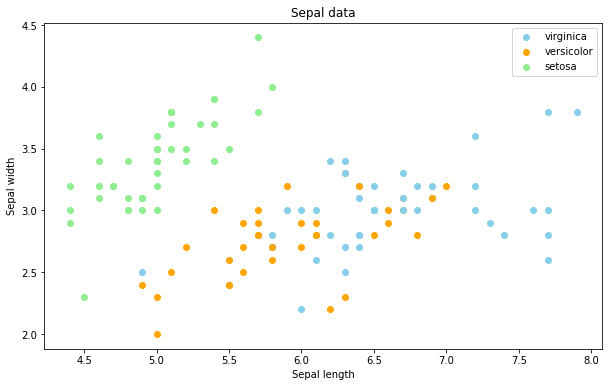

<Figure size 432x288 with 0 Axes>

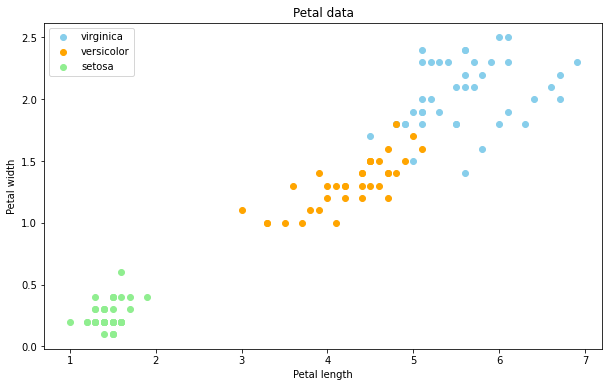

In [16]:
def plot_iris_data(x, y, colour_map, cls, title, xlabel, ylabel):
    plt.clf()
    plt.figure(2, figsize=(10, 6))
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Plot the training points
    for x_, y_, colour, c in zip(x, y, colour_map, cls):
        plt.scatter(x_, y_, c=colour, label=labels[c])

    handles, label = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(label, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.show()

plot_iris_data(get_col(x, 0), get_col(x, 1), colour_map, y, "Sepal data", "Sepal length", "Sepal width")

plot_iris_data(get_col(x, 2), get_col(x, 3), colour_map, y, "Petal data", "Petal length", "Petal width")

In [17]:
#Build our classifier:

from sklearn.svm import SVC
svm = SVC(C=0.01, kernel='rbf', gamma=10)

In [18]:
#Fit to our data:
svm.fit(x, y)

#calculate accuracy
accuracy = svm.score(x, y)
print('Model accuracy:',accuracy*100,'%')

Model accuracy: 63.33333333333333 %


A great way to visualise the quality of our model would be to plot all data points and colour them one colour if they were correctly classified and another colour if they were incorrectly classified.

The light blue points represent correctly classified examples, where the red points represent misclassifications.

In [19]:
correct_classifications = [x == y for x, y in zip(svm.predict(x), y)]
#print(correct_classifications)

In [20]:
colours = {0:'red', 1:'skyblue'}

colour_map = [colours[x] for x in correct_classifications] #map all outputs to a colour for plotting
#print(colour_map)

<Figure size 432x288 with 0 Axes>

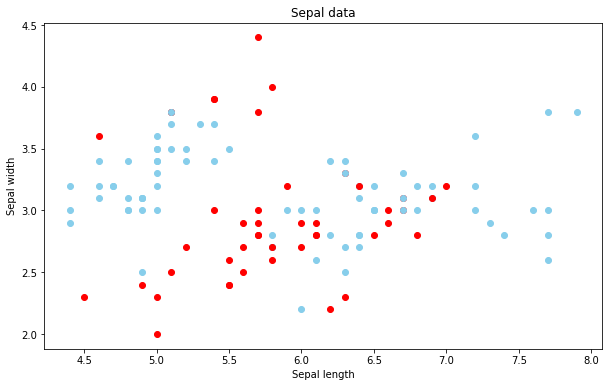

<Figure size 432x288 with 0 Axes>

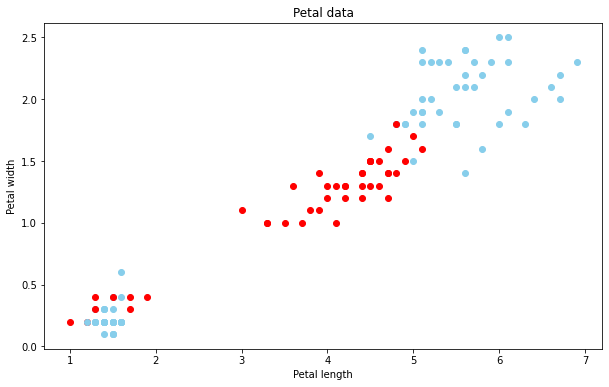

In [21]:
def get_col(lst, col):
    return [row[col] for row in lst]

def plot_iris_data(x, y, colours, title, xlabel, ylabel):
    plt.clf()
    plt.figure(2, figsize=(10, 6))

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Plot the training points
    for x_, y_, c in zip(x, y, colours):
        plt.scatter(x_, y_, c=c)

    plt.show()

plot_iris_data(get_col(x, 0), get_col(x, 1), colour_map, "Sepal data", "Sepal length", "Sepal width")

plot_iris_data(get_col(x, 2), get_col(x, 3), colour_map, "Petal data", "Petal length", "Petal width")

## Grid Search
A key challenge in machine learning with SVMs is to choose suitable classifier parameters (e.g. “C“ and “gamma“) that maximize the classifier’s success rate. One method of finding these optimal parameters isto perform a search over a range of acceptable parameters. While this is not always a fast solution, it is often better than simply randomly selecting parameters or using the default parameters of a toolbox.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

#set up parameters to iterate over
parameters = {'kernel':('linear', 'rbf'),
                'C':[0.0001, 0.001, 0.01, 0.1, 1],
                'gamma':[0.0001, 0.001, 0.01, 0.1, 1]
              }

clf = GridSearchCV(svm.SVC(), parameters)

clf.fit(x, y) #iterate over all configurations

print("Best parameters:", clf.best_params_)

Best parameters: {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}


In [23]:
svm = SVC(C=1, kernel='linear', gamma=0.0001)

svm.fit(x, y)

accuracy = svm.score(x, y)
print('Model accuracy:',accuracy*100,'%')

Model accuracy: 98.33333333333333 %


<Figure size 432x288 with 0 Axes>

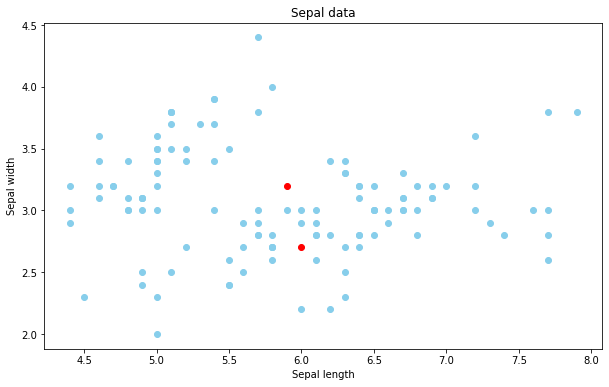

<Figure size 432x288 with 0 Axes>

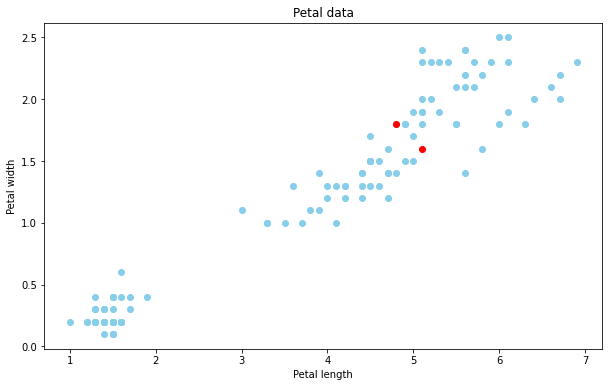

In [24]:
correct_classifications = [x == y for x, y in zip(svm.predict(x), y)]
#print(correct_classifications)
colours = {0:'red', 1:'skyblue'}

colour_map = [colours[x] for x in correct_classifications] #map all outputs to a colour for plotting

plot_iris_data(get_col(x, 0), get_col(x, 1), colour_map, "Sepal data", "Sepal length", "Sepal width")

plot_iris_data(get_col(x, 2), get_col(x, 3), colour_map, "Petal data", "Petal length", "Petal width")